In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
import backprop as bp

In [8]:
def make_dataset(trainfile, testfile):
    #Takes name of training set and test set, breaks into input vectors and targets
    #Initializes arrays that will contain data set
    imgtr = []
    tartr = []
    imgte = []
    tarte = []
    numOutputs = 10
    
    #Opens training data set
    fd = open(trainfile, 'r')
    loaded = fd.readlines()
    fd.close()
    
    fdtr = open(testfile, 'r')
    loadedtr = fdtr.readlines()
    fdtr.close()

    #Pre-process the training data set
    for line in loaded:
        #reset options
        opt = np.array([0.] * numOutputs)

        #split off classification from input array
        linebits = line.split(',')
        imgtr.append(np.asfarray(linebits[1:])/255)  #currently (784,1) on intensity scale 0-1reshape((28,28))

        #classify from 0-9
        opt[int(linebits[0])] = 1.
        tartr.append(opt)
    print(len(imgtr), len(imgtr[0]), len(tartr), tartr[-1], linebits[0])
    
    #Same thing for test data set
    for line in loadedtr:
        opt = np.array([0.] * numOutputs)
        
        linebits = line.split(',')
        imgte.append(np.asfarray(linebits[1:])/255)
        

        opt[int(linebits[0])] = 1.
        tarte.append(opt)
    print(len(imgte), len(imgte[0]), len(tarte), tarte[-1], linebits[0])
    return imgtr, tartr, imgte, tarte
imgtr, tartr, imgte, tarte = make_dataset("mnist_train_100.csv", "mnist_test_10.csv")

100 784 100 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1
10 784 10 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 9


3 (625,)


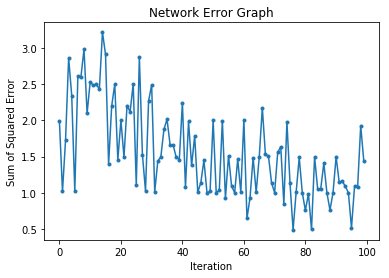

last guess:  2
actual vector:  1
difference:  [ 1.85021506e-04 -9.42504153e-01  1.00000000e+00  1.66227223e-10
  3.27421919e-03  5.35500559e-13  6.92028846e-03  1.92460485e-10
  5.23331833e-11  9.95667604e-01]


In [9]:
lastweights = bp.trainNetwork(imgtr, .05, [784, 625, 625, 10], tartr)